In [1]:
from zzd.utils.assess import multi_scores
import numpy as np
import numpy as np
from sklearn import metrics
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


#load data

EsmMean_c1_list = []
EsmMean_c1_list_std = []
EsmMean_c2h_list = []
EsmMean_c2h_list_std = []
EsmMean_c2p_list = []
EsmMean_c2p_list_std = []
EsmMean_c3_list = []
EsmMean_c3_list_std = []
for idx_portion in np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)):
    C1223_Xgboost_EsmMean_c1,  C1223_Xgboost_EsmMean_c2h,   C1223_Xgboost_EsmMean_c2p,   C1223_Xgboost_EsmMean_c3= [],[],[],[]
    for i in range(10):
        C1223_Xgboost_EsmMean_c1.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c1_test_pred_{i}.txt")[:,-2:])
        C1223_Xgboost_EsmMean_c2h.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c2h_pred_{i}.txt")[:,-2:])
        C1223_Xgboost_EsmMean_c2p.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c2p_pred_{i}.txt")[:,-2:])  
        C1223_Xgboost_EsmMean_c3.append(
            np.genfromtxt(f"./preds/10folds_C1223_Xgboost_ablation_{idx_portion}EsmMean/c3_pred_{i}.txt")[:,-2:])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c1[_][:,0],C1223_Xgboost_EsmMean_c1[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c1_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c1_list_std.append(np.std(mean_score,0)[-1])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c2h[_][:,0],C1223_Xgboost_EsmMean_c2h[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c2h_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c2h_list_std.append(np.std(mean_score,0)[-1])
        
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c2p[_][:,0],C1223_Xgboost_EsmMean_c2p[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c2p_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c2p_list_std.append(np.std(mean_score,0)[-1])
    
    mean_score = [multi_scores(C1223_Xgboost_EsmMean_c3[_][:,0],C1223_Xgboost_EsmMean_c3[_][:,1],show=False)  for _ in range(10)]
    EsmMean_c3_list.append(np.mean(mean_score,0)[-1])
    EsmMean_c3_list_std.append(np.std(mean_score,0)[-1])
    # break
        
        
EsmMean_c1_list = np.array(EsmMean_c1_list)
EsmMean_c1_list_std = np.array(EsmMean_c1_list_std)
EsmMean_c2h_list = np.array(EsmMean_c2h_list)
EsmMean_c2h_list_std = np.array(EsmMean_c2h_list_std)
EsmMean_c2p_list = np.array(EsmMean_c2p_list)
EsmMean_c2p_list_std = np.array(EsmMean_c2p_list_std)
EsmMean_c3_list = np.array(EsmMean_c3_list)
EsmMean_c3_list_std = np.array(EsmMean_c3_list_std)

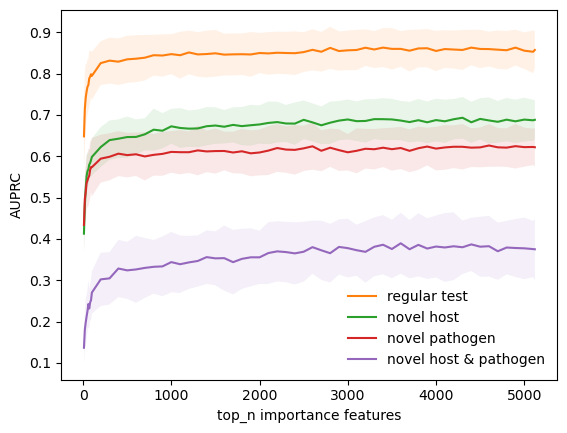

In [2]:
import matplotlib.pyplot as plt
default_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c1_list,label="regular test",color=default_color[1])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c1_list+EsmMean_c1_list_std,
                        EsmMean_c1_list-EsmMean_c1_list_std,
                        facecolor=default_color[1],
                        alpha=0.1)
plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c2h_list,label="novel host",color=default_color[2])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c2h_list+EsmMean_c2h_list_std,
                        EsmMean_c2h_list-EsmMean_c2h_list_std,
                        facecolor=default_color[2],
                        alpha=0.1)

plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c2p_list,label="novel pathogen",color=default_color[3])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c2p_list+EsmMean_c2p_list_std,
                        EsmMean_c2p_list-EsmMean_c2p_list_std,
                        facecolor=default_color[3],
                        alpha=0.1)

plt.plot(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),EsmMean_c3_list,label="novel host & pathogen",color=default_color[4])
plt.fill_between(np.hstack(( np.arange(10,100,10),np.arange(100,5120,100),5120)),
                        EsmMean_c3_list+EsmMean_c3_list_std,
                        EsmMean_c3_list-EsmMean_c3_list_std,
                        facecolor=default_color[4],
                        alpha=0.1)

#plt.vlines(800,0.1,1,linestyles='solid')

plt.xlabel("top_n importance features")
plt.ylabel("AUPRC")
plt.legend(shadow=False, framealpha=0,)
plt.savefig('pics/Xgboost_EsmMean_ablation.png', bbox_inches='tight',dpi=600)